Project 1 - Classpass data analysis

In [329]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')


#read in the csv file
df = pd.read_csv('friday_classpass.csv',encoding = 'unicode_escape')
df.sample(10)

,Title,Instructor,Rating,Reviews,Time,Duration,Venue,Location,Tags,Price
1402,TH 101: Conditioning,Zack Daley,4.9,16619.0,4:30 pm,55,Tone House,Upper East Side,Strength Training,11
1976,B|FIT (Grand Central),none,4.8,24469.0,6:15 pm,60,BRICK Grand Central,Midtown East,"Arms, Strength Training",9
710,Vinyasa Flow,Kimberly Yoga,4.5,253.0,12:00 pm,75,Move With Grace: Yoga & Juice Bar,Clinton Hill,"Relaxation, Flexibility, Balance, Arms, Yoga",6
362,Reformer: Stretch (S 1st),Melody Goodell,4.8,27837.0,10:00 am,55,East River Pilates,Williamsburg,"Flexibility, Balance, Core, Abs, Pilates",8
329,WOOOM Yoga Experience,Amy Norton,4.8,15841.0,10:00 am,75,WOOM CENTER,Bowery,"Flexibility, Balance, Arms, Yoga",6
1830,Intermediate/Advanced Reformer/Tower,Bethany Shao,4.7,8813.0,6:00 pm,60,Gramercy Pilates NYC,Gramercy Park,"Flexibility, Balance, Core, Abs, Pilates, Stre...",9
208,Hatha Morning Wake-Up Flow,Mary Lou Burkhardt,4.8,145.0,9:30 am,75,unit 108 yoga,NaN,Yoga,5
1913,Tone & Tempo (Total Body Pull),none,4.9,2299.0,6:00 pm,60,Sage Fit Astoria,Astoria,Strength Training,5
1132,Bike Rental,none,4.9,212.0,2:30 pm,120,Unlimited Biking,Harlem,"Cardio, Cycling, Outdoors",5
2023,Kryo Body,none,4.9,61.0,6:30 pm,30,Kollectiv,East Village,NaN,21


In [330]:
df.dtypes

Title         object
Instructor    object
Rating        object
Reviews       object
Time          object
Duration       int64
Venue         object
Location      object
Tags          object
Price          int64
dtype: object

In [331]:
df.columns = df.columns.str.lower() #put all headers to lower case for ease of manipulation 

In [332]:
df = df[~df['instructor'].str.contains("none")] #removes any row which has 'none' in the instructor column 

In [333]:
df = df[~df['rating'].str.contains("none")] #removes any row which has 'none' in the rating column 

In [334]:
df = df[~df['reviews'].str.contains("#VALUE!")] #removes any row which has '#VALUE!' in the reviews column 

In [335]:
(df == "none").any() #check for any none values

title         False
instructor    False
rating        False
reviews       False
time          False
duration      False
venue         False
location      False
tags          False
price         False
dtype: bool

In [336]:
df.dropna(inplace = True) #drop all NaN's

In [337]:
df.isnull().sum().sum() #double check

0

In [338]:
df["rating"]=df["rating"].astype(float) #change type

In [341]:
df["reviews"]=df["reviews"].astype(np.int64) #change type

In [342]:
df.dtypes

title          object
instructor     object
rating        float64
reviews         int64
time           object
duration        int64
venue          object
location       object
tags           object
price           int64
dtype: object

In [343]:
df.corr()

,rating,reviews,duration,price
rating,1.000000,0.262652,-0.022287,0.267587
reviews,0.262652,1.000000,-0.199746,0.513789
duration,-0.022287,-0.199746,1.000000,-0.206737
price,0.267587,0.513789,-0.206737,1.000000


In [344]:
df

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215,8:30 am,55,New York Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates",25
1,SKY TING Yoga,Grace Dubery,4.8,17389,8:30 am,60,SKY TING,Tribeca,"Flexibility, Balance, Arms, Yoga",11
2,WundaBar Workout,Marta Picaporte,4.8,19814,8:30 am,45,WundaBar Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates, Stre...",16
3,BigToe Flow,Patrick Rafferty,4.8,2394,8:30 am,60,BigToe Yoga,SoHo,"Flexibility, Balance, Arms, Yoga",4
4,Pilates Reformer: Burnout,Lisa Jantzie,4.9,37864,8:30 am,50,New York Pilates,Bowery,"Flexibility, Balance, Core, Abs, Pilates",25
5,Signature II,Veronika Cohen,4.9,59396,8:30 am,60,Physique 57,SoHo,"Flexibility, Balance, Core, Abs, Barre",12
6,Flywheel: Method 45,Cedric Green,4.8,41488,8:30 am,45,Flywheel Sports: Stadium Cycling,Tribeca,"Cardio, Cycling",13
7,EXCEED: The Workout,Jed Cabreira,4.9,25869,8:30 am,50,Exceed Physical Culture,Tribeca,Strength Training,12
8,Pilates Reformer: Sculpt + Restore,Heran Haile,4.8,23958,8:30 am,55,New York Pilates,Greenwich Village,"Flexibility, Balance, Core, Abs, Pilates",25
9,barre3,Jenna Muller,4.8,34598,8:30 am,60,barre3,West Village,"Flexibility, Balance, Core, Abs, Barre",16


In [397]:
#in this cell we want to group by location and analyse the effect of location on the price and the rating
location = df.groupby('location').agg('count') #grouping by location and taking the count
loc_lis = location[location['title'] > 20].index.tolist() #making a list where all of the title column is greater than 10
loc_df = location[location['title'] > 20]
'''try using plotly to disaply the highest concentrated areas over a map of newyork
get the latitude and longitude of each location - can find by putting it into google -
create two new columns with latitude and longitude ''' 
loc_df

,title,instructor,rating,reviews,time,duration,venue,tags,price
location,,,,,,,,,
Astoria,36,36,36,36,36,36,36,36,36
Bowery,27,27,27,27,27,27,27,27,27
Brooklyn Heights,32,32,32,32,32,32,32,32,32
Chelsea,56,56,56,56,56,56,56,56,56
East Village,39,39,39,39,39,39,39,39,39
Financial District,27,27,27,27,27,27,27,27,27
Flatiron,93,93,93,93,93,93,93,93,93
Greenwich Village,58,58,58,58,58,58,58,58,58
Hoboken,33,33,33,33,33,33,33,33,33


In [346]:
filt_df = df[df['location'].isin(loc_lis)] #filter the dataframe for locations with more than 10 gyms 
filt_df

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215,8:30 am,55,New York Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates",25
1,SKY TING Yoga,Grace Dubery,4.8,17389,8:30 am,60,SKY TING,Tribeca,"Flexibility, Balance, Arms, Yoga",11
2,WundaBar Workout,Marta Picaporte,4.8,19814,8:30 am,45,WundaBar Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates, Stre...",16
3,BigToe Flow,Patrick Rafferty,4.8,2394,8:30 am,60,BigToe Yoga,SoHo,"Flexibility, Balance, Arms, Yoga",4
4,Pilates Reformer: Burnout,Lisa Jantzie,4.9,37864,8:30 am,50,New York Pilates,Bowery,"Flexibility, Balance, Core, Abs, Pilates",25
5,Signature II,Veronika Cohen,4.9,59396,8:30 am,60,Physique 57,SoHo,"Flexibility, Balance, Core, Abs, Barre",12
6,Flywheel: Method 45,Cedric Green,4.8,41488,8:30 am,45,Flywheel Sports: Stadium Cycling,Tribeca,"Cardio, Cycling",13
7,EXCEED: The Workout,Jed Cabreira,4.9,25869,8:30 am,50,Exceed Physical Culture,Tribeca,Strength Training,12
8,Pilates Reformer: Sculpt + Restore,Heran Haile,4.8,23958,8:30 am,55,New York Pilates,Greenwich Village,"Flexibility, Balance, Core, Abs, Pilates",25
9,barre3,Jenna Muller,4.8,34598,8:30 am,60,barre3,West Village,"Flexibility, Balance, Core, Abs, Barre",16


In [347]:
filt_df.groupby('location') #here we want to groupby location and venue

In [375]:
loc_price = filt_df.groupby('location').mean()['price'] #mean price per location 
loc_reviews = filt_df.groupby('location').mean()['reviews'] #reviews against location
loc_rating = filt_df.groupby('location').mean()['rating'] #rating against location
loc_reviews

location
Astoria                3939.583333
Bowery                18270.555556
Brooklyn Heights       8401.968750
Chelsea               21666.464286
East Village          13364.717949
Financial District    12978.777778
Flatiron              24975.462366
Greenwich Village     16047.051724
Hoboken                4444.606061
Jersey City            3698.925000
Middle Village          347.000000
Midtown               26275.975610
Midtown East          11333.177778
Montclair               704.863636
NoHo                  34190.780488
NoMad                 24316.600000
Park Slope             7365.944444
SoHo                  23494.258065
Tribeca               13477.876712
Union Square          19198.862069
Upper East Side       15159.629139
Upper West Side       13076.345324
West Village          16759.000000
Williamsburg          11852.107692
Name: reviews, dtype: float64

In [349]:
type(loc_price)

pandas.core.series.Series

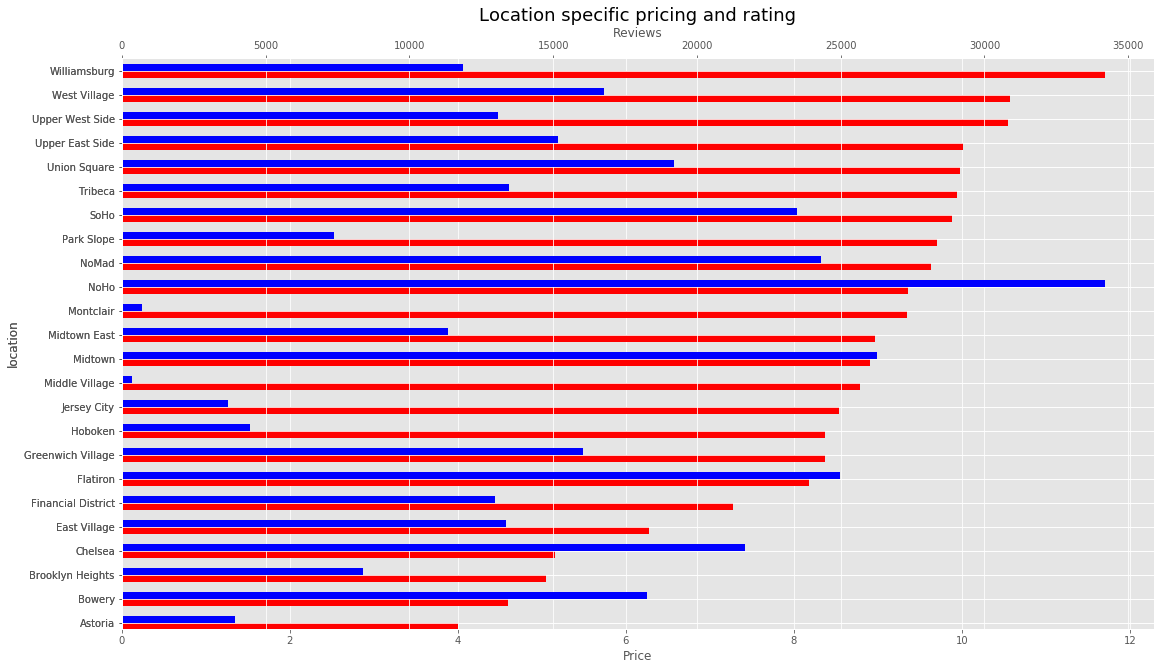

In [382]:
# loc_price.sort_values(ascending=True).plot(kind='barh', color="#264bec")
# loc_rating.sort_values(ascending=True).plot(kind='barh', color="r")



fig = plt.figure() # Create matplotlib figure
fig.set_size_inches(18.5, 10.5)


ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same y-axis as ay.

width = 0.3

loc_price.sort_values(ascending=True).plot(kind='barh', color='r', ax=ax, width=width, position=1)
loc_reviews.plot(kind='barh', color='blue', ax=ax2, width=width, position=0)

ax.set_xlabel('Price')
ax2.set_xlabel('Reviews')
plt.title('Location specific pricing and rating', fontsize=18)
plt.show()

# plt.xlabel('Price in credits')
# plt.ylabel('Location')
#plt.title('Location specific pricing', fontsize=18)

In [351]:
df

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215,8:30 am,55,New York Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates",25
1,SKY TING Yoga,Grace Dubery,4.8,17389,8:30 am,60,SKY TING,Tribeca,"Flexibility, Balance, Arms, Yoga",11
2,WundaBar Workout,Marta Picaporte,4.8,19814,8:30 am,45,WundaBar Pilates,SoHo,"Flexibility, Balance, Core, Abs, Pilates, Stre...",16
3,BigToe Flow,Patrick Rafferty,4.8,2394,8:30 am,60,BigToe Yoga,SoHo,"Flexibility, Balance, Arms, Yoga",4
4,Pilates Reformer: Burnout,Lisa Jantzie,4.9,37864,8:30 am,50,New York Pilates,Bowery,"Flexibility, Balance, Core, Abs, Pilates",25
5,Signature II,Veronika Cohen,4.9,59396,8:30 am,60,Physique 57,SoHo,"Flexibility, Balance, Core, Abs, Barre",12
6,Flywheel: Method 45,Cedric Green,4.8,41488,8:30 am,45,Flywheel Sports: Stadium Cycling,Tribeca,"Cardio, Cycling",13
7,EXCEED: The Workout,Jed Cabreira,4.9,25869,8:30 am,50,Exceed Physical Culture,Tribeca,Strength Training,12
8,Pilates Reformer: Sculpt + Restore,Heran Haile,4.8,23958,8:30 am,55,New York Pilates,Greenwich Village,"Flexibility, Balance, Core, Abs, Pilates",25
9,barre3,Jenna Muller,4.8,34598,8:30 am,60,barre3,West Village,"Flexibility, Balance, Core, Abs, Barre",16


In [353]:
def tidy_split(df, column, sep=',', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df
tag_split_df = tidy_split(df,'tags')
tag_split_df

,title,instructor,rating,reviews,time,duration,venue,location,tags,price
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215,8:30 am,55,New York Pilates,SoHo,Flexibility,25
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215,8:30 am,55,New York Pilates,SoHo,Balance,25
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215,8:30 am,55,New York Pilates,SoHo,Core,25
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215,8:30 am,55,New York Pilates,SoHo,Abs,25
0,Pilates Reformer: Abs Arms Ass,Meg Broome,4.9,26215,8:30 am,55,New York Pilates,SoHo,Pilates,25
1,SKY TING Yoga,Grace Dubery,4.8,17389,8:30 am,60,SKY TING,Tribeca,Flexibility,11
1,SKY TING Yoga,Grace Dubery,4.8,17389,8:30 am,60,SKY TING,Tribeca,Balance,11
1,SKY TING Yoga,Grace Dubery,4.8,17389,8:30 am,60,SKY TING,Tribeca,Arms,11
1,SKY TING Yoga,Grace Dubery,4.8,17389,8:30 am,60,SKY TING,Tribeca,Yoga,11
2,WundaBar Workout,Marta Picaporte,4.8,19814,8:30 am,45,WundaBar Pilates,SoHo,Flexibility,16


In [369]:
genre_list = ["Cycling" ,"Yoga", "Pilates","Boxing","Dance","Martial Arts"]
genres = tag_split_df[(tag_split_df['tags'].isin(genre_list))]
genre_reviews = genres.groupby('tags').mean()['reviews'] #check to see how different types of class vary with no reviews 
genre_price = genres.groupby('tags').mean()['price'] #check to see how different types of class vary with price
genre_durat = genres.groupby('tags').mean()['duration'] #check to see how different types of class vary with time

Text(0.5, 1.0, 'Genre specific pricing')

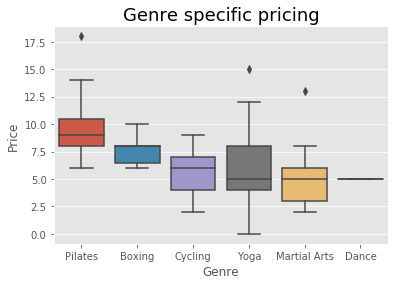

In [373]:
idx = genres.groupby('tags').median()['price'].sort_values(ascending=False).index
sns.boxplot(x='tags', y='price', data=genres,order = idx)
plt.xlabel('Genre')
plt.ylabel('Price')
plt.title('Genre specific pricing', fontsize=18)

tags
Boxing          7.454545
Cycling         5.600000
Dance           5.000000
Martial Arts    5.266667
Pilates         9.695652
Yoga            5.950000
Name: price, dtype: float64


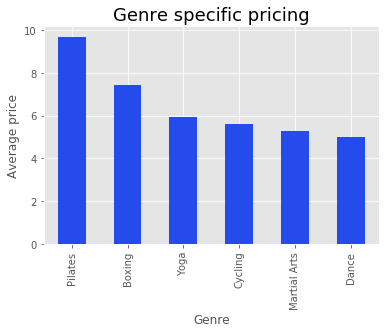

In [371]:
genre_price.sort_values(ascending=False).plot(kind='bar', color="#264bec")
plt.xlabel('Genre')
plt.ylabel('Average price')
plt.title('Genre specific pricing', fontsize=18)
print(genre_price)

Text(0.5, 1.0, 'Genre specific popularity')

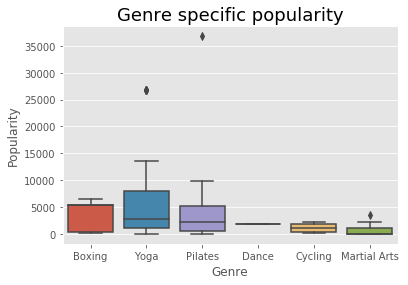

In [374]:
idx = genres.groupby('tags').median()['reviews'].sort_values(ascending=False).index
sns.boxplot(x='tags', y='reviews', data=genres,order = idx)
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Genre specific popularity', fontsize=18)

tags
Boxing          3494.090909
Cycling         1149.000000
Dance           1828.000000
Martial Arts     700.200000
Pilates         4666.869565
Yoga            7046.750000
Name: reviews, dtype: float64


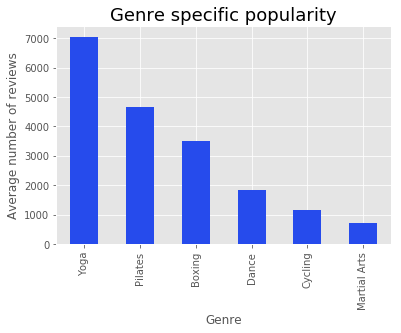

In [383]:
genre_reviews.sort_values(ascending=False).plot(kind='bar', color="#264bec")
plt.xlabel('Genre')
plt.ylabel('Average number of reviews')
plt.title('Genre specific popularity', fontsize=18)
print(genre_reviews)

Text(0.5, 1.0, 'Genre specific class duration')

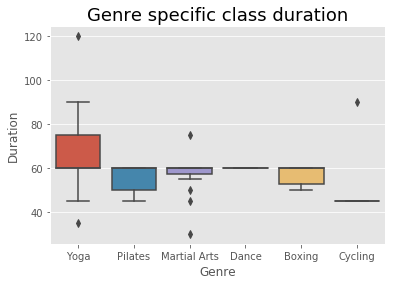

In [384]:
idx = genres.groupby('tags').median()['duration'].sort_values(ascending=False).index
sns.boxplot(x='tags', y='duration', data=genres,order = idx)
plt.xlabel('Genre')
plt.ylabel('Duration')
plt.title('Genre specific class duration', fontsize=18)

tags
Boxing          56.363636
Cycling         54.000000
Dance           60.000000
Martial Arts    57.000000
Pilates         55.000000
Yoga            67.000000
Name: duration, dtype: float64


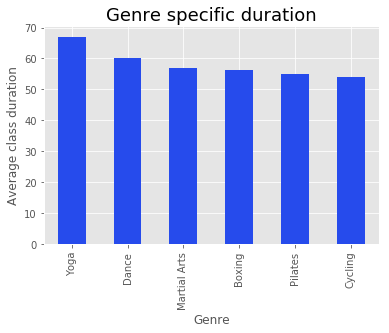

In [361]:
genre_durat.sort_values(ascending=False).plot(kind='bar', color="#264bec")
plt.xlabel('Genre')
plt.ylabel('Average class duration')
plt.title('Genre specific duration', fontsize=18)
print(genre_durat)

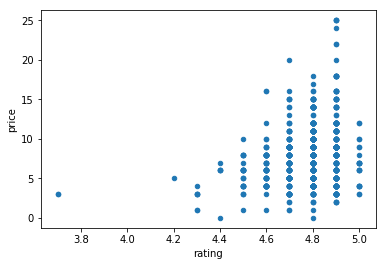

In [276]:
test = df[['rating','price']] #attempt to observe the relationship between class price and its rating
test.plot.scatter('rating','price')

In [387]:
print(df.price.mean())
print(df.rating.mean())
print(df.reviews.mean())
print(df.duration.mean())

8.0207991242474
4.7899835796387356
11984.585112205801
58.20361247947455


In [402]:
grouped_venue = df.groupby('venue').mean() #grouping dataframe by the different gyms
grouped_venue['expensive?'] =(grouped_venue['price']>8.02) #is it expensive?
grouped_venue['highly rated?'] =(grouped_venue['rating']>4.79) #is it highly rated?
grouped_venue['popular?'] =(grouped_venue['reviews']>11984.6) #is it highly rated?
grouped_venue['long?'] =(grouped_venue['duration']>58.2) #is it highly rated?
cleaned_gv = grouped_venue.round(1).sort_values('reviews',ascending=False).head(12)#.mean()['price']
cleaned_gv.drop(['rating', 'reviews','duration','price'], axis=1)
#try using heatmap from plotly - assigning the colour to each value


,expensive?,highly rated?,popular?,long?
venue,,,,
Peloton Cycling Studio,True,True,True,False
Mile High Run Club,True,True,True,False
Physique 57,True,True,True,True
Switch Playground USA,True,True,True,False
Flywheel Sports: Stadium Cycling,True,True,True,False
Laughing Lotus,False,True,True,True
Cyc Fitness,True,True,True,False
Overthrow Boxing Club,True,True,True,False
SWERVE Fitness,True,True,True,False


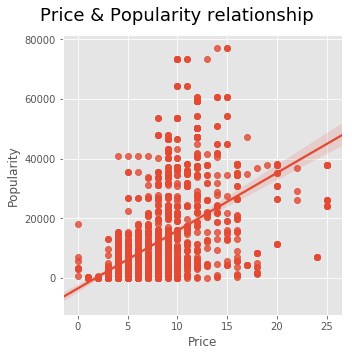

In [414]:
import seaborn as sns
lm = sns.lmplot("price", "reviews", data = df)
lm = lm.set_axis_labels("Price", "Popularity")
fig = lm.fig
fig.suptitle("Price & Popularity relationship", fontsize=18)
lm.fig.subplots_adjust(top=.9)